<a href="https://colab.research.google.com/github/vijetharb15/samsung_vijetha/blob/main/Electricity_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Uploading and loading the data

In [ ]:
from google.colab import files
files.upload()

import pandas as pd

data = pd.read_csv("electricity_consumption.csv")
data.head()


Saving electricity_consumption.csv to electricity_consumption (1).csv


,temperature_c,occupancy_percent,appliance_count,building_type,building_age_years,insulation_rating,window_type,heating_system,cooling_system,lighting_type,occupant_count,work_hours,holiday_flag,weather_condition,consumption_kwh
0,-1.546017,53.448355,19.0,Industrial,28.842679,Poor,Single Pane,Electric,Window Units,Incandescent,10.0,4.461863,0.0,Cloudy,86.319786
1,21.019071,38.021518,12.0,Residential,NaN,Poor,Double Pane,Heat Pump,NaN,LED,1.0,3.614838,0.0,Rainy,213.599647
2,35.247911,67.547082,22.0,Commercial,66.989041,Average,Double Pane,Gas,NaN,Incandescent,5.0,23.357034,0.0,Cloudy,48.994329
3,NaN,72.818305,22.0,Industrial,23.958960,Excellent,Double Pane,Oil,NaN,NaN,NaN,21.114594,1.0,Rainy,413.141864
4,-3.505855,NaN,27.0,Residential,38.549111,Poor,Double Pane,Gas,Window Units,LED,17.0,6.686622,0.0,Rainy,201.789662


This reads the CSV file and stores it as a table (DataFrame) called data.

Gives basic info:

number of rows

column names

data types


Shows statistics like mean, min, max, and standard deviation for numerical columns.

In [ ]:
data.info()
data.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   temperature_c       945 non-null    float64
 1   occupancy_percent   959 non-null    float64
 2   appliance_count     955 non-null    float64
 3   building_type       951 non-null    object 
 4   building_age_years  946 non-null    float64
 5   insulation_rating   948 non-null    object 
 6   window_type         942 non-null    object 
 7   heating_system      941 non-null    object 
 8   cooling_system      623 non-null    object 
 9   lighting_type       964 non-null    object 
 10  occupant_count      954 non-null    float64
 11  work_hours          963 non-null    float64
 12  holiday_flag        945 non-null    float64
 13  weather_condition   942 non-null    object 
 14  consumption_kwh     966 non-null    float64
dtypes: float64(8), object(7)
memory usage: 117.3+ KB


,temperature_c,occupancy_percent,appliance_count,building_age_years,occupant_count,work_hours,holiday_flag,consumption_kwh
count,945.000000,959.000000,955.000000,946.000000,954.000000,963.000000,945.000000,966.000000
mean,15.046731,48.833785,17.047120,50.496983,10.110063,12.092201,0.184127,263.757092
std,14.774326,28.976163,7.130476,28.833881,5.602750,7.128337,0.387793,137.160576
min,-9.987050,0.116928,5.000000,0.225634,1.000000,0.006544,0.000000,11.656815
25%,2.474606,24.498209,11.000000,25.791430,5.000000,5.885497,0.000000,153.025188
50%,14.832047,48.144361,17.000000,49.812600,10.000000,11.951183,0.000000,267.092786
75%,27.808616,73.237444,23.000000,75.743686,15.000000,18.759377,0.000000,383.649880
max,39.981859,99.927008,29.000000,99.943391,19.000000,23.980948,1.000000,499.562389


This output shows the number of missing values in each column of the dataset.

In [ ]:
data.fillna(data.mean(numeric_only=True), inplace=True)
data.isnull().sum()


,0
temperature_c,0
occupancy_percent,0
appliance_count,0
building_type,49
building_age_years,0
insulation_rating,52
window_type,58
heating_system,59
cooling_system,377
lighting_type,36


Data visualization (understanding patterns)

Shows how electricity consumption values are spread

Each dot = one data point

Shows how strongly variables are related to each other
Values close to 1 → strong positive relationship
Values close to -1 → strong negative relationship
Values near 0 → little or no relationship

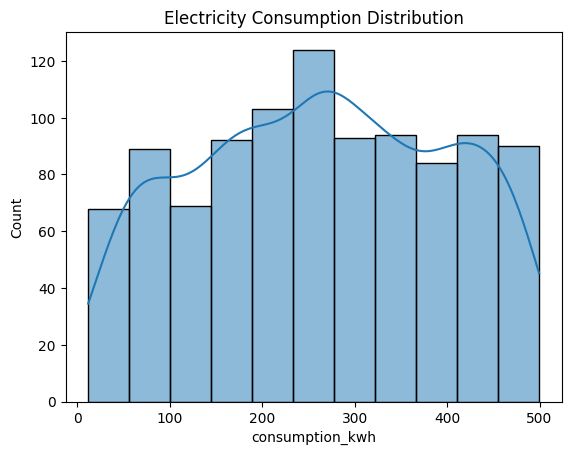

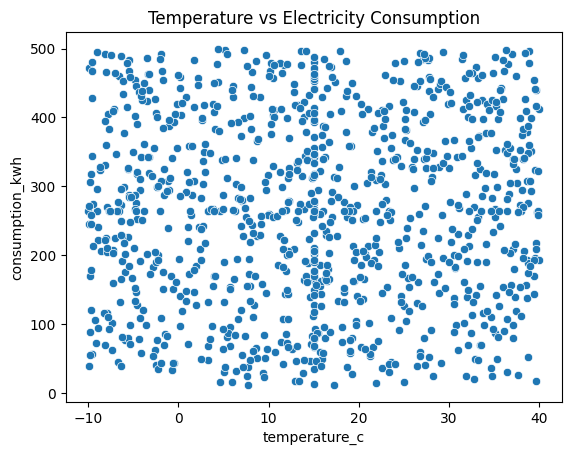

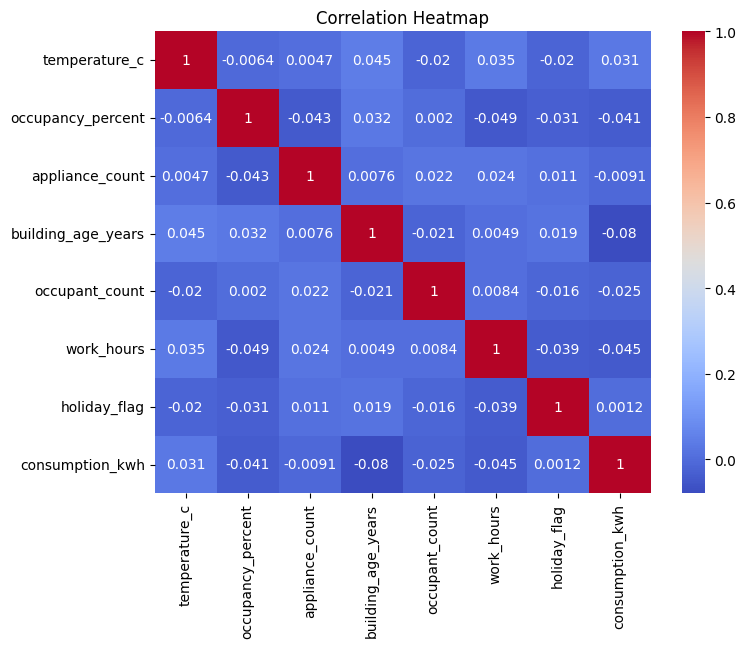

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution
sns.histplot(data['consumption_kwh'], kde=True)
plt.title("Electricity Consumption Distribution")
plt.show()

# Temperature vs Consumption
sns.scatterplot(x='temperature_c', y='consumption_kwh', data=data)
plt.title("Temperature vs Electricity Consumption")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Selecting inputs and output

In [ ]:
X = data[['temperature_c', 'occupancy_percent', 'appliance_count']]
y = data['consumption_kwh']


Splitting the data

Splits data into:
80% training data → to teach the model
20% testing data → to check accuracy

random_state=42 ensures same results every time.
Setting random_state = 42 makes this random process fixed, so the same split happens every time you run the code.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Training the Linear Regression model

Electricity = a*temperature + b*occupancy + c*appliances + constant
a, b, c are learned automatically

constant is the intercept


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Testing the model
The model predicts electricity consumption for unseen data.

Evaluating model performance
Measures prediction error
Lower MSE = better model

Tells how well the model explains the data
1.0 = perfect
0.7–0.9 = very good
< 0.5 = weak

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error (MSE): 18584.130786295686
R² Score: -0.01758334331063449


Comparing actual vs predicted values

In [ ]:
comparison = pd.DataFrame({
    "Actual Consumption": y_test.values,
    "Predicted Consumption": y_pred
})
comparison.head()


,Actual Consumption,Predicted Consumption
0,443.625745,266.821313
1,266.106548,257.789929
2,173.743689,284.416641
3,396.374199,262.795112
4,423.392777,250.137707


Making a sample prediction

give:
Temperature = 30°C
Occupancy = 75%
Appliances = 10
The model predicts:
Estimated electricity consumption in kWh

In [ ]:
sample_input = [[30, 75, 10]]  # temperature, occupancy %, appliance count
sample_prediction = model.predict(sample_input)

print("Predicted Electricity Consumption (kWh):", sample_prediction[0])


Predicted Electricity Consumption (kWh): 261.8559278317588


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np

y_test = np.array(y_test, dtype=float)
y_pred = np.array(y_pred, dtype=float)

tolerance = 0.10

correct = np.abs(y_test - y_pred) <= (tolerance * y_test)
accuracy = np.mean(correct)

print(f"{accuracy:.6f}")


0.170000


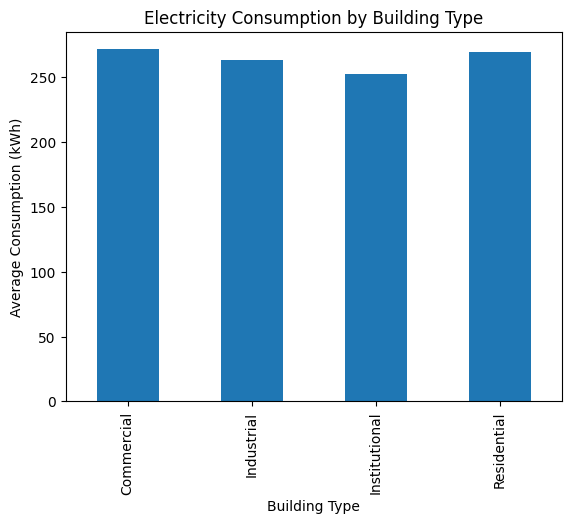

In [ ]:
import matplotlib.pyplot as plt

building_avg = data.groupby("building_type")["consumption_kwh"].mean()

plt.figure()
building_avg.plot(kind="bar")
plt.xlabel("Building Type")
plt.ylabel("Average Consumption (kWh)")
plt.title("Electricity Consumption by Building Type")
plt.show()

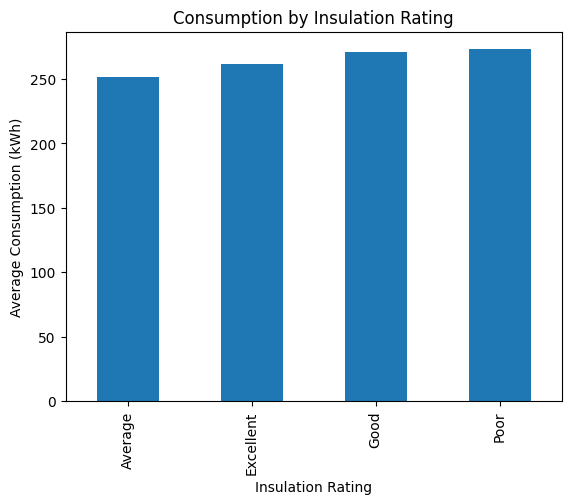

In [ ]:
insulation_avg = data.groupby("insulation_rating")["consumption_kwh"].mean()

plt.figure()
insulation_avg.plot(kind="bar")
plt.xlabel("Insulation Rating")
plt.ylabel("Average Consumption (kWh)")
plt.title("Consumption by Insulation Rating")
plt.show()

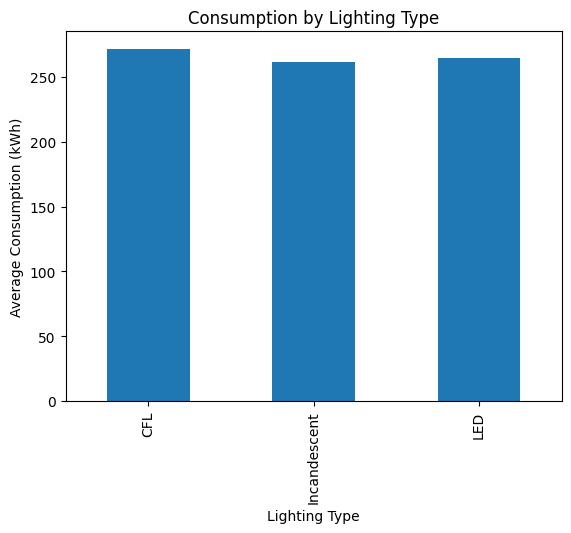

In [ ]:
lighting_avg = data.groupby("lighting_type")["consumption_kwh"].mean()

plt.figure()
lighting_avg.plot(kind="bar")
plt.xlabel("Lighting Type")
plt.ylabel("Average Consumption (kWh)")
plt.title("Consumption by Lighting Type")
plt.show()

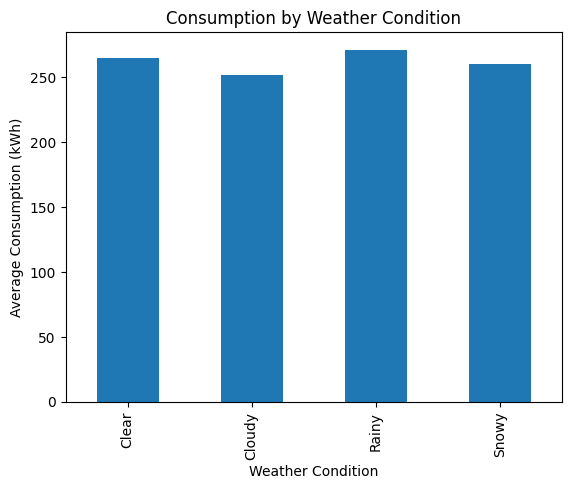

In [ ]:
weather_avg = data.groupby("weather_condition")["consumption_kwh"].mean()

plt.figure()
weather_avg.plot(kind="bar")
plt.xlabel("Weather Condition")
plt.ylabel("Average Consumption (kWh)")
plt.title("Consumption by Weather Condition")
plt.show()

/tmp/ipython-input-4262150555.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  occupancy_avg = data.groupby("occupancy_group")["consumption_kwh"].mean()


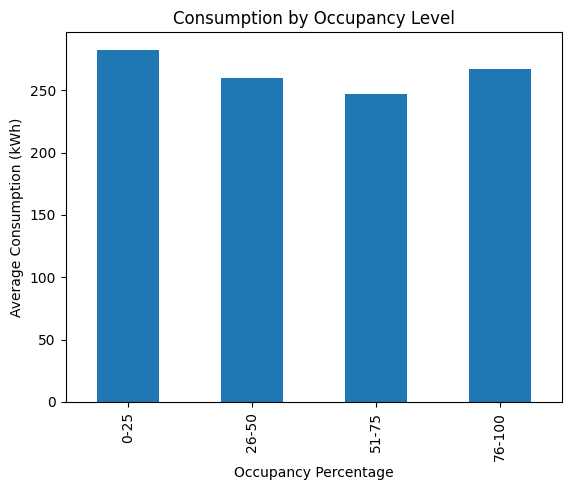

In [ ]:
data["occupancy_group"] = pd.cut(
    data["occupancy_percent"],
    bins=[0, 25, 50, 75, 100],
    labels=["0-25", "26-50", "51-75", "76-100"]
)

occupancy_avg = data.groupby("occupancy_group")["consumption_kwh"].mean()

plt.figure()
occupancy_avg.plot(kind="bar")
plt.xlabel("Occupancy Percentage")
plt.ylabel("Average Consumption (kWh)")
plt.title("Consumption by Occupancy Level")
plt.show()